In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print("Package Loaded")

Package Loaded



Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (1, 20)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (1, 20))


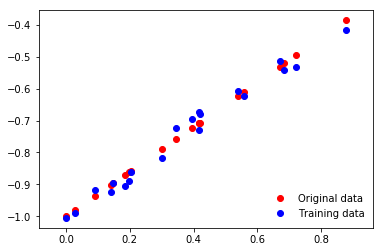

In [2]:
np.random.seed(1)
def f(x, a, b):
    n = train_X.size
    vals = np.zeros((1, n))
    for i in range(0, n):
        ax = np.multiply(a, x.item(i))
        val = np.add(ax, b)
        vals[0, i] = val
    return vals

Wref = 0.7
bref = -1.
n = 20
noise_var = 0.001
train_X = np.random.random((1, n))
ref_Y = f(train_X, Wref, bref)
train_Y = ref_Y + np.sqrt(noise_var)*np.random.randn(1, n)
n_samples = train_X.size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)

plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.axis('equal')
plt.legend(loc='lower right')

### The cost function can be written in the following vectorized form: ###
$$ J(\theta)=\frac{1}{2m}{(X\theta - Y)}^{T}{(X\theta - Y)} $$

where

$$
X = \begin{bmatrix}
{({x}^{(1)})}^{T}\\
{({x}^{(2)})}^{T}\\
\vdots\\
{({x}^{(m)})}^{T}
\end{bmatrix}
\quad \quad
Y = \begin{bmatrix}
{y}^{(1)}\\
{y}^{(2)}\\
\vdots\\
{y}^{(m)}
\end{bmatrix}
$$

### math_ops.matmul(a, b, trainspose_a=False, transpose_b=False, a_is_sparse=False, b_is_sparse=False, name=None)###
- Multiplies matrix a by matrix b, producing a * b. 

### class Variable(object)###
- The variable constructor requires an initial value for the variable, wich can be a 'Tensor' of any type and shape.

### array_ops.placeholder(dtype, shape=None, name='None)###
- Insert a placeholder for a tensor that will be always fed.

### class Optimizer(object)###
#### minimize(loss, global_step=None, var_list=None, ... ) ####
- compute_gradients + apply_gradients

#### compute_gradients(loss, global_step=None, var_list=None, ... ) ####
- compute partial derivateives of sum of 'loss' w.r.t. v in var_list
- var_list : Optional list of 'tf.Variable' to update to minimize 'loss'. Defaults to the list : GraphKey.TRAINABLE_VARIABLES'.
- returns : a list of (gradients, variable) pairs

#### apply_gradients(grads_and_vars, ... ) ####
- apply gradients to variables
- grads_and_vars : List of (gradients, variable) pairs as returned by 'compute_gradients()'.
- returns : an 'Operation' that applies the specified gradients. 

In [ ]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y

def h(X, w):
    return tf.matmul(w, X)

def costF(X, Y, w):
    return tf.matmul((h(X, w) - Y), (h(X, w) - Y), transpose_b=True) / (2*n_samples)

X = tf.placeholder(tf.float64, name="input")
Y = tf.placeholder(tf.float64, name="output")
W = tf.cast(tf.Variable(tf.random_normal([1, 2]), "weight"), tf.float64)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)#.minimize(cost)
#optimizer.minimize(costF(X, Y, W))
#train = optimizer.minimize(costF(X, Y, W))
train = optimizer.apply_gradients(optimizer.compute_gradients(costF(X, Y, W)))

init = tf.initialize_all_variables()

### class Session(BaseSession): ###
**A 'Session' object encapsulates the environment in which 'Operation' objects are excuted, and 'Tensor' objects are evaluated.**
#### __init__( ... ) ####
- Creates a new TensorFlow session.

#### close( ... ) ####
- Close this session.

#### as_default( ... ) ####
- Returns a context manager that makes this object the default session.

#### run(fetches, feed_dict=None, options=None, run_metadata=None) ####
- Runs one "step" of TensorFlow computation, by running the necessary graph fragment to execute every 'Operation' and evaluate every 'Tensor' in 'fetches', substituting the values in 'feed_dict' for the corresponding input values.

#### partial_run( ... ) ####
- Experimental function : continues the execution with more feeds and fetches.


In [ ]:
sess = tf.Session()
#with tf.Session() as sess:
sess.run(init)
# print sess.run(costF(X, Y, W), feed_dict={X:temp_X, Y:temp_Y})
for step in range(20001):
    feed = {X:temp_X, Y:temp_Y}
    sess.run(train, feed)
    # sess.run(train, feed_dict={X:temp_X, Y:temp_Y})
    if step % 1000 == 0:
        print step, sess.run(costF(X, Y, W), feed), sess.run(W)

0 [[ 1.31555872]] [[ 0.8643229   0.00759933]]
1000 [[ 0.01610072]] [[-0.71704727 -0.03997998]]
2000 [[ 0.00595062]] [[-0.83086127  0.25396395]]
3000 [[ 0.00231326]] [[-0.89898515  0.42993084]]
4000 [[ 0.00100978]] [[-0.93976611  0.53526974]]
5000 [[ 0.00054267]] [[-0.9641788   0.59832865]]
6000 [[ 0.00037528]] [[-0.97879291  0.63607794]]
7000 [[ 0.00031529]] [[-0.98754144  0.65867549]]
8000 [[ 0.0002938]] [[-0.99277842  0.67220324]]
9000 [[ 0.00028609]] [[-0.99591315  0.68030059]]
10000 [[ 0.00028333]] [[-0.99778938  0.6851477 ]]
11000 [[ 0.00028234]] [[-0.99891287  0.68804872]]
12000 [[ 0.00028199]] [[-0.99958456  0.68978435]]
13000 [[ 0.00028186]] [[-0.9999854   0.69082266]]
14000 [[ 0.00028182]] [[-1.00022709  0.69144136]]


In [ ]:
plt.figure(1)
plt.plot(train_X[0, :], ref_Y[0, :], 'ro', label='Original data')
plt.plot(train_X[0, :], train_Y[0, :], 'bo', label='Training data')
plt.plot(train_X[0, :], sess.run(h(X, W), feed_dict = {X:temp_X})[0, :], 'k', label='Fitting Line')
plt.axis('equal')
plt.legend(loc='lower right')